<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/Introduction_to_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DBSCAN - Density-based spatial clustering of applications with noise


Imagine you have a flat surface filled with various groups of tightly packed dots, and some dots scattered around the surface. If you were to pour water on this surface, the water would fill up spaces between the tightly packed groups first, leaving the scattered dots isolated. DBSCAN essentially works like this water. It tries to find clusters of data points that are close to each other (densely packed) while labeling points that are alone in low-density regions as outliers (like the isolated scattered dots).

### Key Concepts:

1. **Density**: The number of points within a certain radius.
2. **Core Point**: If a point has a specified number of other points within its radius, it's considered a core point.
3. **Border Point**: A point that is not a core point but is close enough to be reached by the density around a core point.
4. **Noise Point**: A point that is neither a core point nor a border point. It's far away from any dense cluster.

### The Process:

1. **Step 1**: For each point, the algorithm counts how many points are located within a given distance (called `epsilon`).
2. **Step 2**: A point is marked as a core point if there are at least `min_samples` points (including the point itself) within `epsilon` distance of it.
3. **Step 3**: Points within the `epsilon` distance of a core point but not core points themselves are labeled as border points.
4. **Step 4**: All points that aren't core points or border points are considered noise.
5. **Step 5**: Each core point either creates a new cluster or is added to a nearby existing cluster.
6. **Step 6**: Border points are assigned to the clusters of nearby core points. Noise points remain unclustered.


7. **Distance Calculation**: Determining the distance between points to understand which points are within the `epsilon` radius of others. The most common distance measure used is Euclidean distance.

Distance(p, q) = sqrt((p_1 - q_1)^2 + (p_2 - q_2)^2 + ... + (p_n - q_n)^2)

8. **Density Estimation**: Counting how many points fall within the `epsilon` radius of a given point.

The beauty of DBSCAN lies in its ability to find clusters of arbitrary shapes (unlike k-means, which is more suited for spherical clusters) and its capability to identify noise in the data.

#Compairing DBSCAN to K-Means

In [1]:
from sklearn.datasets import make_circles, make_moons, make_blobs

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Circles DataSet

[make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles)

In [5]:
circles_ds = make_circles(n_samples=200)

In [9]:
circles_ds[0].shape

(200, 2)

In [34]:
circles_X1, circles_X2 = circles_ds[0][:, 0], circles_ds[0][:, 1]


<Axes: >

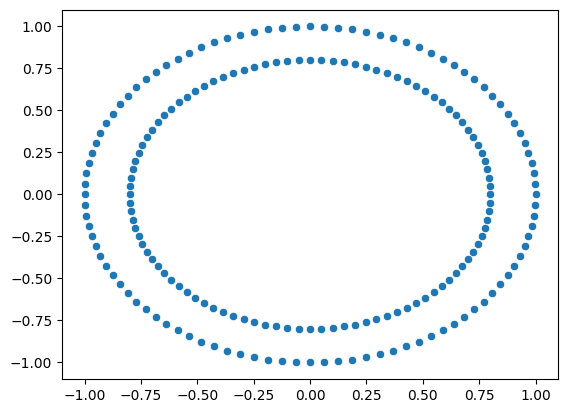

In [35]:
sns.scatterplot(x=circles_X1, y=circles_X2)

##Blobs DataSet

[make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)

In [17]:
blobs_ds = make_blobs(n_samples=200)

In [18]:
blobs_ds[0].shape

(200, 2)

In [37]:
blobs_X1, blobs_X2 = blobs_ds[0][:, 0], blobs_ds[0][:, 1]

<Axes: >

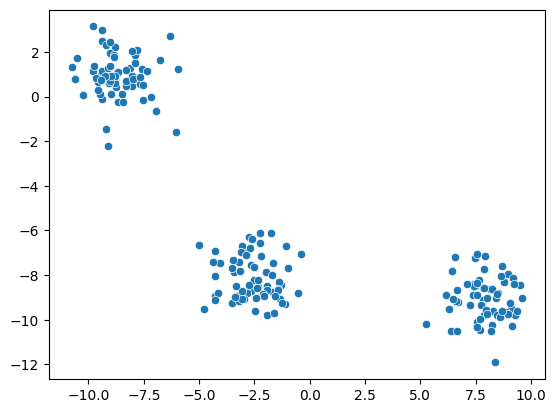

In [38]:
sns.scatterplot(x=blobs_X1, y=blobs_X2)

##Moons DataSet

[make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)

In [22]:
moons_ds = make_moons(n_samples=200)

In [23]:
moons_ds[0].shape

(200, 2)

In [39]:
moons_X1, moons_X2 = moons_ds[0][:, 0], moons_ds[0][:, 1]

<Axes: >

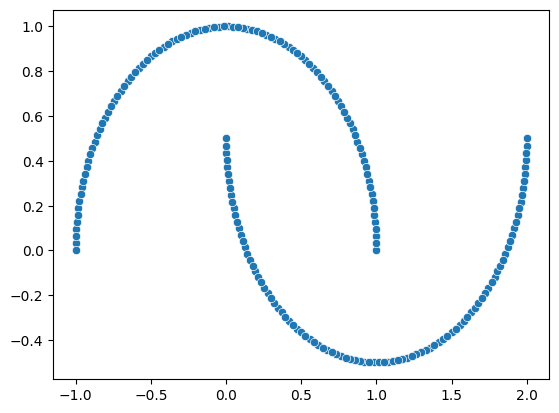

In [41]:
sns.scatterplot(x=moons_X1, y=moons_X2)

In [55]:
def displyClusters(model, data):
  data_X1, data_X2 = data[0][:, 0], data[0][:, 1]
  labels = model.fit_predict(data[0])
  sns.scatterplot(x=data_X1, y=data_X2, hue=labels, palette="gist_rainbow")

##KMeans

In [50]:
from sklearn.cluster import KMeans

In [51]:
k_model = KMeans(n_clusters=3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


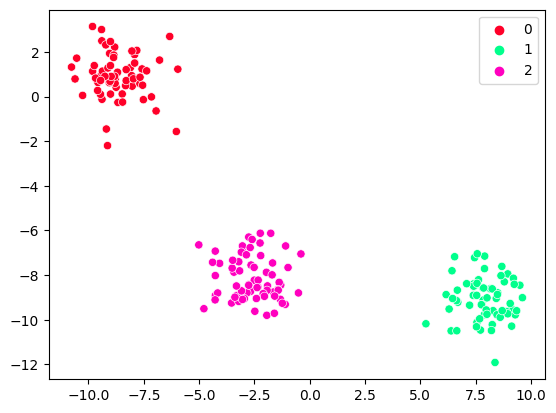

In [56]:
displyClusters(k_model, blobs_ds)

In [57]:
k_model = KMeans(n_clusters=2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


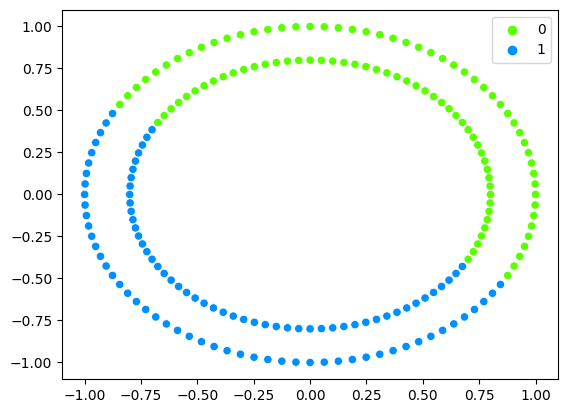

In [58]:
displyClusters(k_model, circles_ds)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


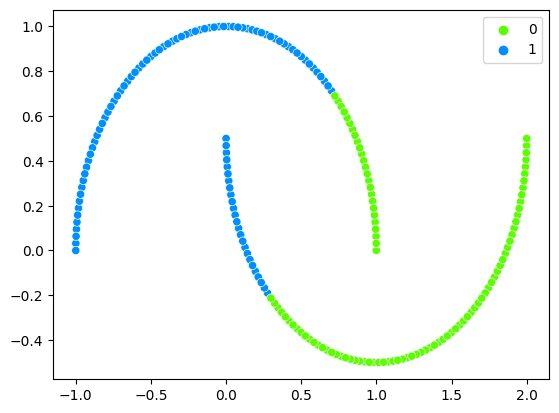

In [59]:
displyClusters(k_model, moons_ds)

##DBSCAN

In [60]:
from sklearn.cluster import DBSCAN

In [68]:
dbscan_model = DBSCAN(eps=1)

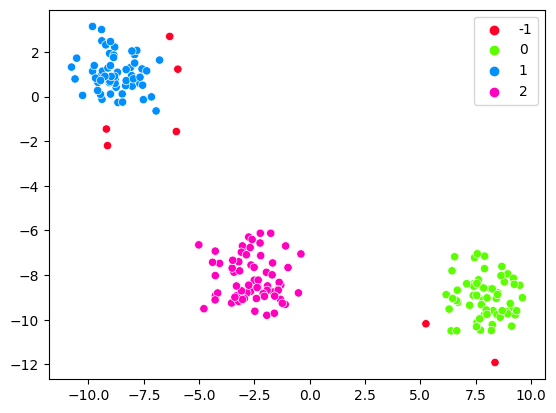

In [69]:
displyClusters(dbscan_model, blobs_ds)

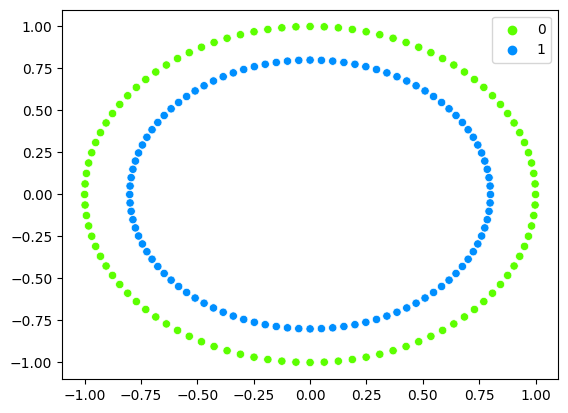

In [71]:
dbscan_model = DBSCAN(eps=0.15)
displyClusters(dbscan_model, circles_ds)

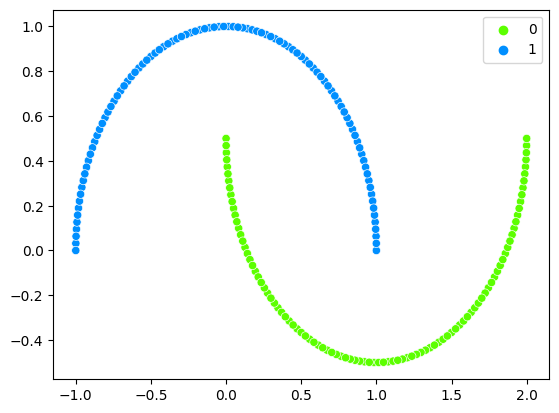

In [72]:
displyClusters(dbscan_model, moons_ds)